In [1]:
# Import required libraries and dependencies
# import numpy as np
import pandas as pd
#import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_delivery_data = pd.read_csv(
    "uber_yelp_merged.csv",
    index_col="Restaurant_Name")

# Display sample data
df_delivery_data.head()

,min_price,rating,total_reviews,category,location,province,address,Latitude,Longitude,Province
Restaurant_Name,,,,,,,,,,
The Flying Pig,$$,4.0,1300,Canadian (New),vancouver,BC,"1168 Hamilton Street Unit 104 Vancouver, BC V6...",49.275039,-123.122038,BC
Kingyo,$$,4.4,1100,Japanese,vancouver,BC,"871 Denman Street Vancouver, BC V6G 2L9 Canada",49.290612,-123.137095,BC
Miku,$$$,4.4,2200,Japanese,vancouver,BC,"200 Granville Street Suite 70 Vancouver, BC V6...",49.286826,-123.112583,BC
Kosoo,$$,4.3,88,Korean,vancouver,BC,"1128 Robson Street Vancouver, BC V6E 1B2 Canada",49.284988,-123.125959,BC
Dinesty Dumpling House,$$,3.9,928,Chinese,vancouver,BC,"1719 Robson Street Vancouver, BC V6G 1C8 Canada",49.290780,-123.134073,BC


In [4]:
# Dictionary to map '$' signs to corresponding values
price_mapping = {
    '$$$$': 100,    # very expensive
    '$$$': 75,      # moderate expensive
    '$$': 50,       # medium expensive
    '$': 25         # cheap
}

# Create a function to map the '$' signs to values
def map_price_sign(sign):
    return price_mapping.get(sign, 0)  # Default to 0 if the sign is not found in the mapping

# Apply the mapping function to the 'object_column'
df_delivery_data['min_price'] = df_delivery_data['min_price'].apply(map_price_sign)


In [5]:
if 'min_price' in df_delivery_data and 'total_reviews' in df_delivery_data:
    df_delivery_data[['min_price', 'total_reviews']] = df_delivery_data[['min_price', 'total_reviews']].astype(float)
df_delivery_data.dtypes

min_price        float64
rating           float64
total_reviews    float64
category          object
location          object
province          object
address           object
Latitude         float64
Longitude        float64
Province          object
dtype: object

In [10]:
columns_to_drop = ['category', 'location', 'province', 'address', 'Longitude', 'Latitude', 'Province']
final_delivery_df = df_delivery_data.drop(columns_to_drop, axis=1)
final_delivery_df.head()

,min_price,rating,total_reviews
Restaurant_Name,,,
The Flying Pig,0.0,4.0,1300.0
Kingyo,0.0,4.4,1100.0
Miku,0.0,4.4,2200.0
Kosoo,0.0,4.3,88.0
Dinesty Dumpling House,0.0,3.9,928.0


In [11]:
final_delivery_df.dtypes

min_price        float64
rating           float64
total_reviews    float64
dtype: object

In [12]:
final_delivery_df_scaler = StandardScaler().fit_transform(final_delivery_df)


In [13]:
final_delivery_df_scaled=pd.DataFrame(final_delivery_df_scaler, columns= final_delivery_df.columns)
final_delivery_df_scaled['category']=final_delivery_df.index
final_delivery_df_scaled= final_delivery_df_scaled.set_index('category')
final_delivery_df_scaled.head()

,min_price,rating,total_reviews
category,,,
The Flying Pig,0.0,0.084884,4.338694
Kingyo,0.0,0.795273,3.597862
Miku,0.0,0.795273,7.672437
Kosoo,0.0,0.617676,-0.150747
Dinesty Dumpling House,0.0,-0.092713,2.960747


In [25]:
k=list(range(1,11))


In [26]:
inertias = []
for i in k:
  model= KMeans(n_clusters=i,random_state=0)
  model.fit(final_delivery_df_scaled)
  inertias.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [27]:
inertias

[2314.000000000002,
 1592.1334506226285,
 935.2340036209764,
 693.4681010399074,
 469.18654341706883,
 372.99481717420895,
 283.7993284467886,
 237.0917017113673,
 202.07988565446792,
 169.01239834088642]

In [28]:
#dictionary with the data to plot the Elbow curve
elbow_data={'k': k,'Inertia':inertias}
elbow_df= pd.DataFrame(elbow_data)
elbow_df.head()


,k,Inertia
0,1,2314.000000
1,2,1592.133451
2,3,935.234004
3,4,693.468101
4,5,469.186543


<Axes: xlabel='k'>

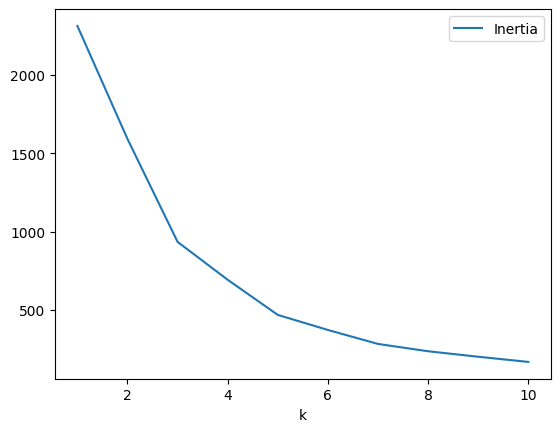

In [29]:
elbow_df.plot.line('k','Inertia')

the lower number for K = 3 and inertia



In [30]:
model = KMeans(n_clusters=3)

In [31]:
# Fit the K-Means model using the scaled data
model.fit(final_delivery_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [32]:
# Predict the clusters to group the cryptocurrencies using the scaled data
delivery_data_pred=model.predict(final_delivery_df_scaled)
# Print the resulting array of cluster values.
delivery_data_pred


array([1, 1, 1, ..., 0, 2, 0], dtype=int32)

In [33]:
#copy of the Data
delivery_data_df_4 = final_delivery_df_scaled.copy()

In [34]:
delivery_data_df_4 = final_delivery_df_scaled.copy()
delivery_data_df_4['segment_4'] = delivery_data_pred
delivery_data_df_4.head()

,min_price,rating,total_reviews,segment_4
category,,,,
The Flying Pig,0.0,0.084884,4.338694,1
Kingyo,0.0,0.795273,3.597862,1
Miku,0.0,0.795273,7.672437,1
Kosoo,0.0,0.617676,-0.150747,2
Dinesty Dumpling House,0.0,-0.092713,2.960747,1


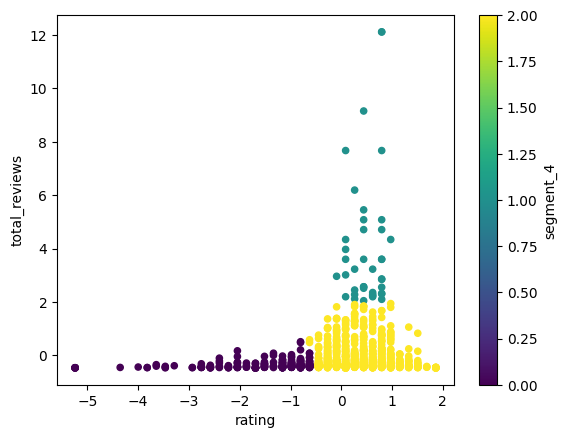

In [35]:
delivery_data_df_4.plot.scatter('rating','total_reviews',
                              c='segment_4', colormap='viridis')
plt.show()
